<a href="https://colab.research.google.com/github/yatish7/Used_Cars_Price_Prediction-using-random-Forest/blob/main/Used_car_Price_Prediction_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing dataset
ds=pd.read_csv("car data.csv")

In [ ]:
#Displaying Dataset
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Gives the no of rows and columns as output
ds.shape

(301, 9)

In [ ]:
#displays all the columns
ds.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#Gives the info of the datatypes of attributes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Displaying all the attributes with object (categorical columns)
ds.select_dtypes(include="object").columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
ds.select_dtypes(include=["float64","int64"]).columns #all the attributes of int, float(numerical columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [ ]:
ds.describe() #gives count ,mean,standard deviation of values

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
ds.isna().sum() #gives no of null values for each attribute in dataset

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
ds=ds.drop(columns='Car_Name') #no need of car_name

In [ ]:
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
ds['Current Year']=2023 #Setting the current_year(new attribute) to 2023 so that we can calculate how many years its been

In [ ]:
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [ ]:
ds['Years Old']=ds['Current Year']-ds['Year'] #Calculating no of years the car was used
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Years Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [ ]:
ds=ds.drop(columns=['Year','Current Year']) #after thus no need of year bought and current year for this

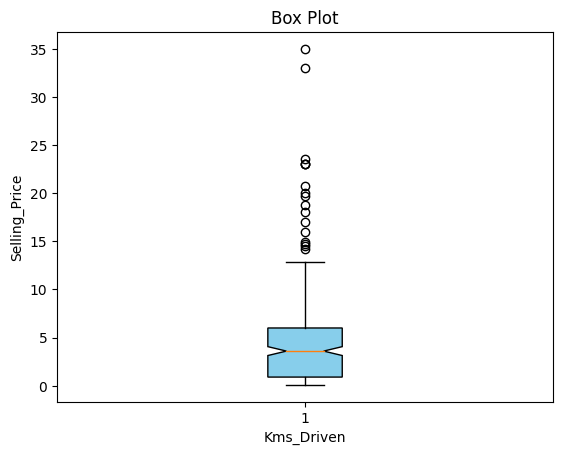

In [ ]:
plt.boxplot(ds['Selling_Price'], notch=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.title('Box Plot')
plt.show()


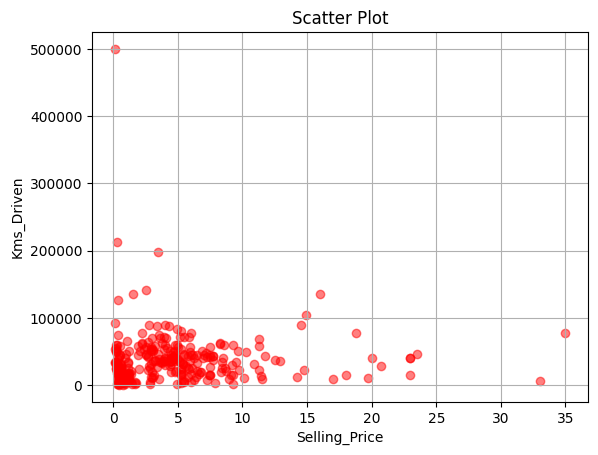

In [ ]:
plt.scatter(ds['Selling_Price'], ds['Kms_Driven'], marker='o', color='red', alpha=0.5)
plt.xlabel('Selling_Price')
plt.ylabel('Kms_Driven')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()


In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [ ]:
ds=pd.get_dummies(data=ds,drop_first=True) #one hot coding,label encoding etc
ds.head() #Labeling all object datatypes with numbers

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [ ]:
x=ds.drop(columns="Selling_Price") #Matrix of Features

In [ ]:
y=ds['Selling_Price'] #Target varriable

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #20% test size 80% training size

In [ ]:
x_train.shape

(240, 8)

In [ ]:
x_test.shape

(61, 8)

In [ ]:
import warnings #to remove warnings during the prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(criterion='squared_error') #object
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn") # default value of no of n_estimators=100
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9611389373406581

HyperParameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV #the default value taken was 100 but its possible we get best output with either less or more so for that we do hyper parameter tunning

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']
}

In [ ]:
parameters

{'n_estimators': [100, 200, 300],
 'max_depth': [None, 5, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']}

In [ ]:
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=parameters, n_iter=10, scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [ ]:
random_cv.fit(x_train, y_train) #Training the data

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_split=5)

In [ ]:
random_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


# `Testing`

In [ ]:
single_obs1=[[8.50,3500,0,5,1,0,0,1]]

In [ ]:
regressor.predict(single_obs1)

array([7.355])

In [ ]:
single_obs2=[[6.50,3300,1,5,1,0,0,1]]

In [ ]:
regressor.predict(single_obs2)

array([5.616])

In [ ]:
single_obs3=[[9.50,3700,1,5,1,0,0,1]]

In [ ]:
regressor.predict(single_obs3)

array([8.2888])

In [ ]:
single_obs4=[[9.10,3000,1,6,2,0,0,1]]

In [ ]:
regressor.predict(single_obs4)

array([7.8443])

In [ ]:
single_obs5=[[9.10,3600,1,6,2,0,0,1]]

In [ ]:
regressor.predict(single_obs5)

array([7.8443])

In [ ]:
single_obs6=[[9.0,3100,1,6,2,0,0,1]]

In [ ]:
regressor.predict(single_obs6)

array([7.7423])